# Connectome Analyses

We develop tools to analyze a circuit model's connectome.

In [1]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.connectome\
    import ConnectomeAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


In [2]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()
suite_connectome_analyses =\
    ConnectomeAnalysesSuite(
        sample_size=20)

## Mock circuit

We will use a mock-circuit to test-develop connectome analyses.

In [ ]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

bluepy_mock_circuit =\
    MockCircuit.build(
        circuit_composition,
        circuit_connectivity)
mock_circuit_model =\
    BlueBrainCircuitModel(
        bluepy_mock_circuit,
        label="BlueBrainCircuitModelMockLight")

19228it [00:28, 670.48it/s]

# Adapter Functionality

In this section we develop our adapter's functionality

In [4]:
from neuro_dmt.models.bluebrain.circuit.adapter\
    import BlueBrainCircuitAdapter
adapter = BlueBrainCircuitAdapter()
cell_types_m = adapter.get_cell_types(mock_circuit_model, ("mtype",))
print(cell_types_m.head())
cell_types_me = adapter.get_cell_types(mock_circuit_model, ("mtype", "etype",) )
print(cell_types_me.head())

     mtype
0   L1_DAC
1  L1_SLAC
2   L23_MC
3  L23_ChC
4  L23_SBC
  etype    mtype
0  bNAC   L1_DAC
1   NAC   L1_DAC
2  bNAC  L1_SLAC
3   NAC  L1_SLAC
4  bNAC   L23_MC


In [5]:
pathways = adapter.get_pathways(mock_circuit_model, ("mtype", "etype"))
print(pathways.shape)
assert pathways.shape[0] == cell_types_me.shape[0] ** 2
pathways.head()

(1444, 4)


pre_synaptic         post_synaptic         
         etype   mtype         etype    mtype
0         bNAC  L1_DAC          bNAC   L1_DAC
1         bNAC  L1_DAC           NAC   L1_DAC
2         bNAC  L1_DAC          bNAC  L1_SLAC
3         bNAC  L1_DAC           NAC  L1_SLAC
4         bNAC  L1_DAC          bNAC   L23_MC

In [6]:
pathways.iloc[1]

pre_synaptic   etype      bNAC
               mtype    L1_DAC
post_synaptic  etype       NAC
               mtype    L1_DAC
Name: 1, dtype: object

In [7]:
adapter.get_cells(mock_circuit_model,
                  **pathways.iloc[1].post_synaptic)\
        .etype\
        .unique()

array(['NAC'], dtype=object)

# Number of Afferent Connections

We develop an analysis of the number of afferent connections

In [8]:
from neuro_dmt.analysis.reporting import CheetahReporter
reporter_analyses =\
    CheetahReporter(
        path_output_folder=os.path.join(
            suite_connectome_analyses.path_reports,
            "analyses"))

We can also run our analyses over a chosen set of cell-types.

In [9]:
post_synaptic_cell =\
    suite_connectome_analyses\
        .random_cell(
            mock_circuit_model,
            adapter,
            {"mtype": "L23_MC"})
post_synaptic_cell

etype                    NAC
layer                      2
morph_class      not-defined
mtype                 L23_MC
nucleus          not-defined
region                  S1Tr
synapse_class            INH
x                    140.024
y                    139.018
z                    6.46965
gid                    41549
Name: 41549, dtype: object

In [10]:
cells = adapter.get_cells(mock_circuit_model)
post_synaptic_cell = cells.iloc[0]
m =\
    suite_connectome_analyses\
        .number_connections_afferent_verbose(
            mock_circuit_model, adapter,
            cells.iloc[0],
            cell_properties_groupby=["mtype"])
m.head()

100%|██████████| 82304/82304 [00:06<00:00, 13374.57it/s]


mtype    soma_distance
L1_DAC   150.0            1.0
L1_SLAC  50.0             1.0
L23_ChC  350.0            1.0
         450.0            1.0
L23_MC   150.0            3.0
Name: number_connections_afferent, dtype: float64

In [11]:
xyz = ["x", "y", "z"]
cells.groupby(None)[xyz].agg("sum")

TypeError: You have to supply one of 'by' and 'level'

In [12]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement

pathway_measurement =\
    PathwayMeasurement(
        value=suite_connectome_analyses.number_connections_afferent_verbose,
        by_soma_distance=True,
        direction="AFF",
        specifiers_cell_type=["mtype"],
        sample_size=20)

ms =[
    m for m in pathway_measurement.sample(
        mock_circuit_model,
        adapter,
        post_synaptic_cell={"mtype": "L23_MC"})] 
mms = pd.concat(ms, axis=1).head()
#mms.groupby(["soma_distance"]).agg("sum")
mms


20985  41992  20930  829    41492  \
(pre_synaptic_cell, mtype) soma_distance                                      
L1_DAC                     50.0             NaN    NaN    NaN    NaN    NaN   
                           150.0            1.0    NaN    NaN    NaN    NaN   
                           250.0            NaN    2.0    NaN    2.0    NaN   
                           350.0            NaN    NaN    NaN    NaN    NaN   
                           450.0            NaN    NaN    NaN    NaN    NaN   

                                          368    21520  945    41558  21503  \
(pre_synaptic_cell, mtype) soma_distance                                      
L1_DAC                     50.0             NaN    NaN    NaN    NaN    NaN   
                           150.0            NaN    NaN    NaN    1.0    NaN   
                           250.0            NaN    NaN    2.0    1.0    NaN   
                           350.0            NaN    1.0    NaN    NaN    NaN   
                           450.0            NaN    NaN    NaN    NaN    1.0   

                                          42017  21433  62647  41598  62645  \
(pre_synaptic_cell, mtype) soma_distance                                      
L1_DAC                     50.0             NaN    NaN    NaN    NaN    NaN   
                           150.0            NaN    NaN    NaN    1.0    NaN   
                           250.0            NaN    NaN    NaN    2.0    NaN   
                           350.0            1.0    1.0    5.0    NaN    NaN   
                           450.0            1.0    NaN    NaN    NaN    NaN   

                                          393    890    62138  62027  41478  
(pre_synaptic_cell, mtype) soma_distance                                     
L1_DAC                     50.0             NaN    NaN    1.0    NaN    NaN  
                           150.0            1.0    NaN    3.0    1.0    NaN  
                           250.0            NaN    NaN    1.0    NaN    NaN  
                           350.0            NaN    NaN    NaN    NaN    NaN  
                           450.0            NaN    NaN    NaN    NaN    NaN

In [14]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement

pathway_measurement =\
    PathwayMeasurement(
        value=lambda connections: connections.strength.to_numpy(dtype=np.float64),
        variable="total_afferent_synapses",
        by_soma_distance=False,
        direction="AFF",
        #specifiers_cell_type=["mtype"],
        sample_size=20,
        summaries="sum")

ms = pathway_measurement.summary(
        mock_circuit_model,
        adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
print(len(ms))
ms
#pd.concat(ms, axis=1).head()

TypeError: 'Series' object is not callable

In [28]:
 pathway_measurement.summaries[0] if len(pathway_measurement.summaries) == 1 else pathway_measurement.summaries

'sum'

In [29]:
pathway_measurement.collect(
    mock_circuit_model,
    adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"}
).agg("sum", axis=1)

ValueError: No axis named 1 for object type <class 'type'>

In [22]:
pathway_measurement.sample_one(mock_circuit_model,
                               adapter,
                               post_synaptic_cell={"mtype": "L23_MC"})\
                   .max()

1168.0

In [14]:
pathway_measurement.collect(mock_circuit_model,
                            adapter,
                            post_synaptic_cell={"mtype": "L23_MC"})\
                   .head()

,62651,62078,21494,62060,62631,42030,62119,346,41474,41434,62099,62652,20927,41966,21417,41586,62076,62595,42047,41568
soma_distance,,,,,,,,,,,,,,,,,,,,
50.0,NaN,5.0,3.0,4.0,NaN,NaN,NaN,10.0,15.0,9.0,NaN,NaN,17.0,6.0,7.0,6.0,15.0,6.0,8.0,5.0
150.0,66.0,23.0,112.0,21.0,31.0,68.0,33.0,52.0,13.0,20.0,47.0,31.0,25.0,17.0,44.0,33.0,27.0,27.0,113.0,19.0
250.0,101.0,32.0,124.0,32.0,169.0,111.0,40.0,13.0,5.0,25.0,14.0,131.0,NaN,104.0,26.0,8.0,9.0,71.0,171.0,13.0
350.0,104.0,50.0,105.0,14.0,112.0,82.0,3.0,19.0,33.0,24.0,6.0,130.0,7.0,153.0,76.0,11.0,10.0,100.0,82.0,24.0
450.0,78.0,136.0,54.0,80.0,18.0,48.0,25.0,112.0,148.0,151.0,105.0,43.0,131.0,55.0,98.0,100.0,143.0,111.0,44.0,126.0


In [15]:
pathway_measurement.summary(mock_circuit_model,
                            adapter,
                            post_synaptic_cell={"mtype": "L23_MC"})\
                   .head()

,count,sum,mean,mad,std,var,min,median,max
50.0,15.0,188.0,12.533333,7.502222,10.534750,110.980952,2.0,11.0,43.0
150.0,19.0,775.0,40.789474,26.343490,33.510494,1122.953216,7.0,29.0,120.0
250.0,18.0,1425.0,79.166667,61.518519,66.017155,4358.264706,4.0,43.0,186.0
350.0,18.0,1234.0,68.555556,38.716049,46.070563,2122.496732,6.0,75.5,165.0
450.0,20.0,1836.0,91.800000,25.980000,30.041375,902.484211,41.0,89.5,133.0


 11%|█         | 2/19 [00:00<00:01,  8.76it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value 

 26%|██▋       | 5/19 [00:00<00:01,  8.82it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value 

 37%|███▋      | 7/19 [00:00<00:01,  9.36it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value 

 58%|█████▊    | 11/19 [00:01<00:00,  9.98it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value 

 68%|██████▊   | 13/19 [00:01<00:00, 10.25it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value 

 89%|████████▉ | 17/19 [00:01<00:00, 10.56it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value 

100%|██████████| 19/19 [00:01<00:00, 10.62it/s]


/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/__init__.py Logger
ALERT@<2020-02-19 19:27:26>                                                     

                    Argument `sampling_methodology` will be dropped.
                    A sampling methodology of random was set at the time this PathwayMeasurement 
                    instance computing method was generated.
                    Provided value Not Provided will be dropped.
                    



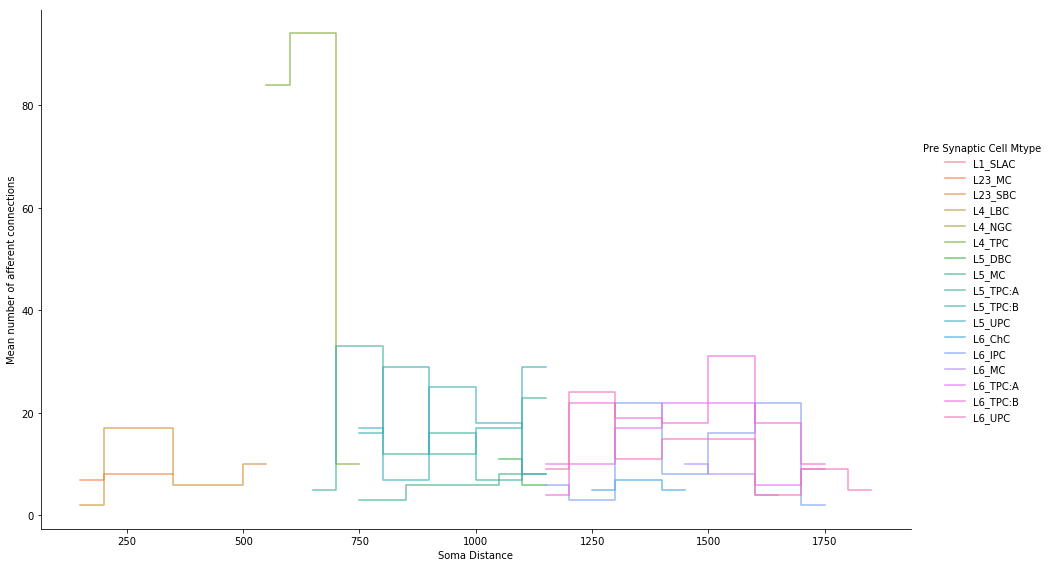

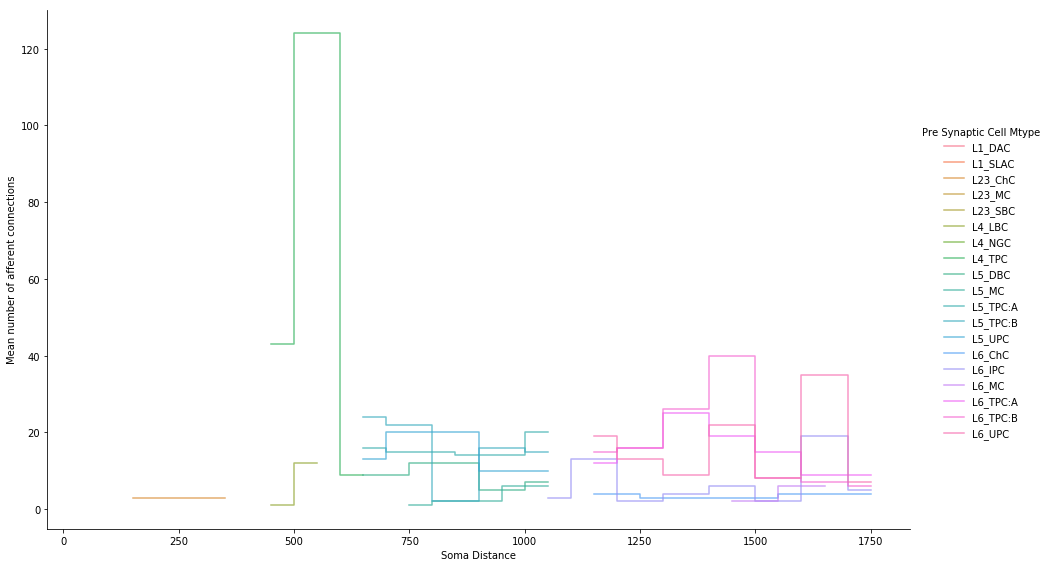

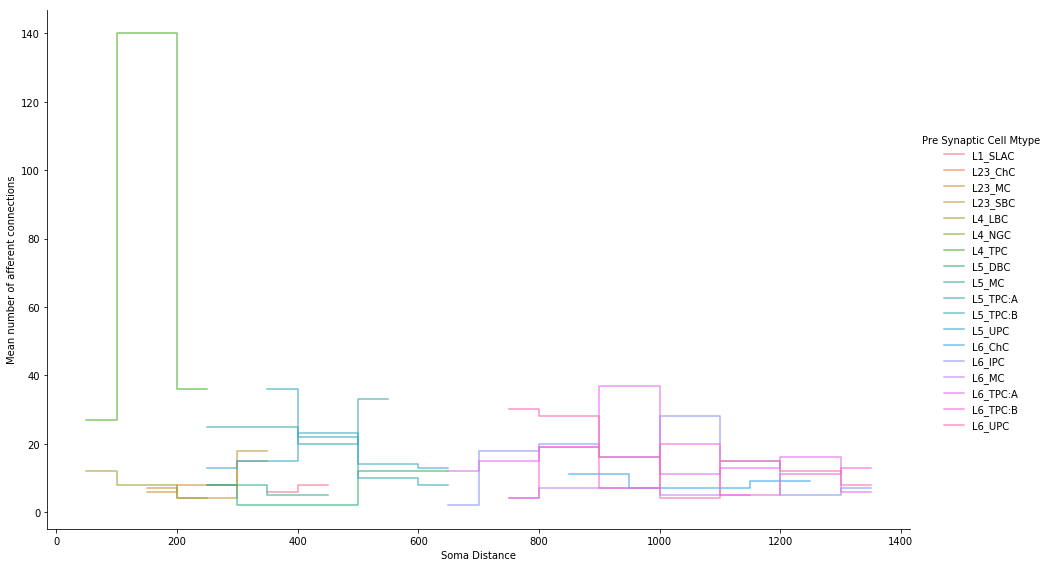

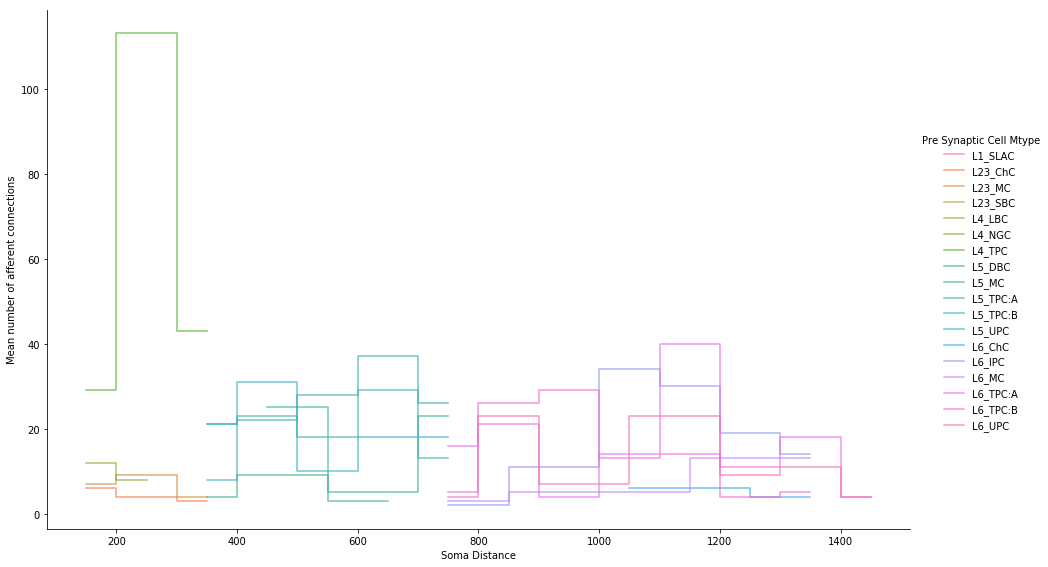

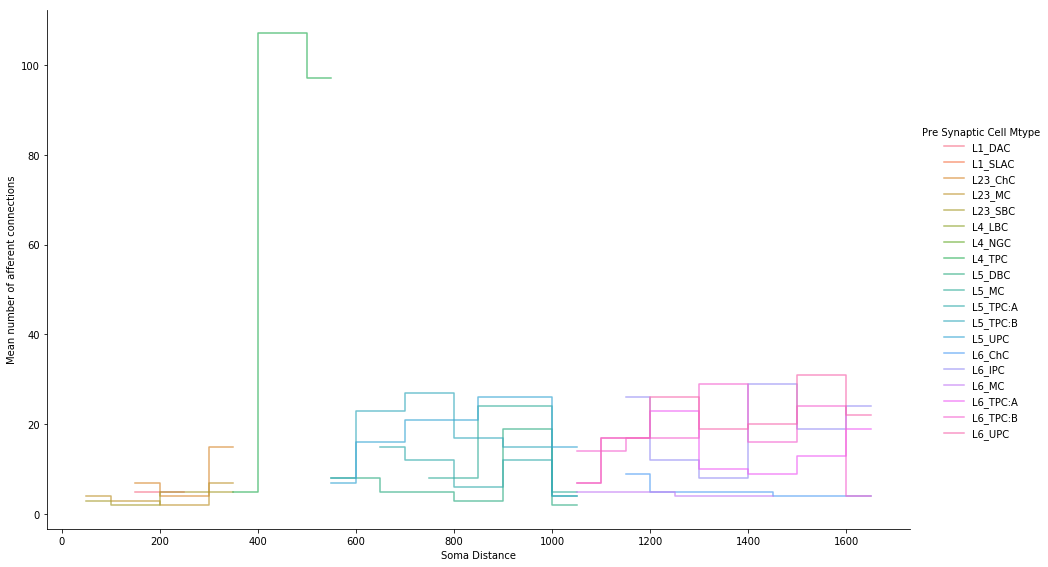

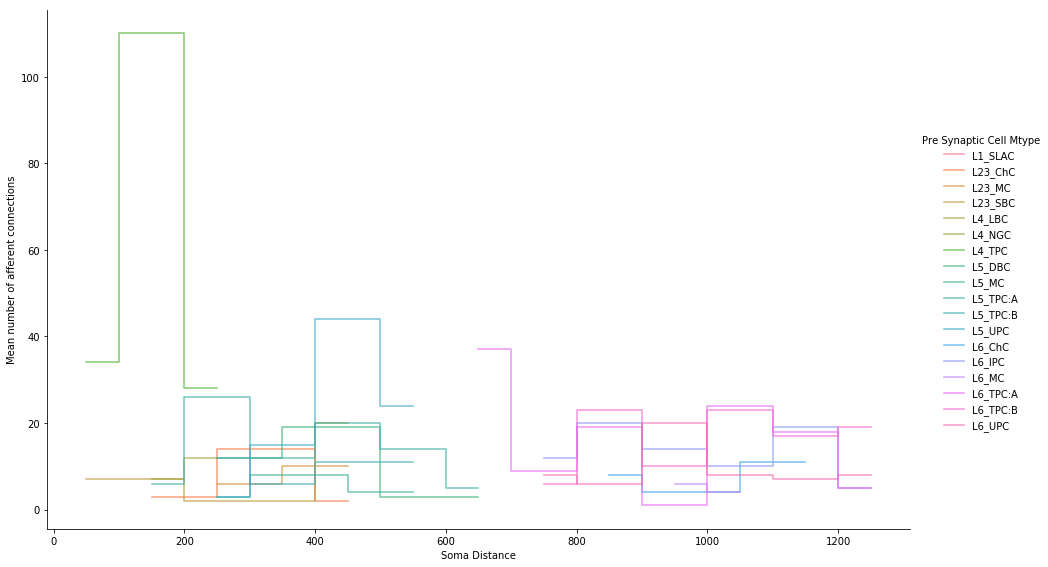

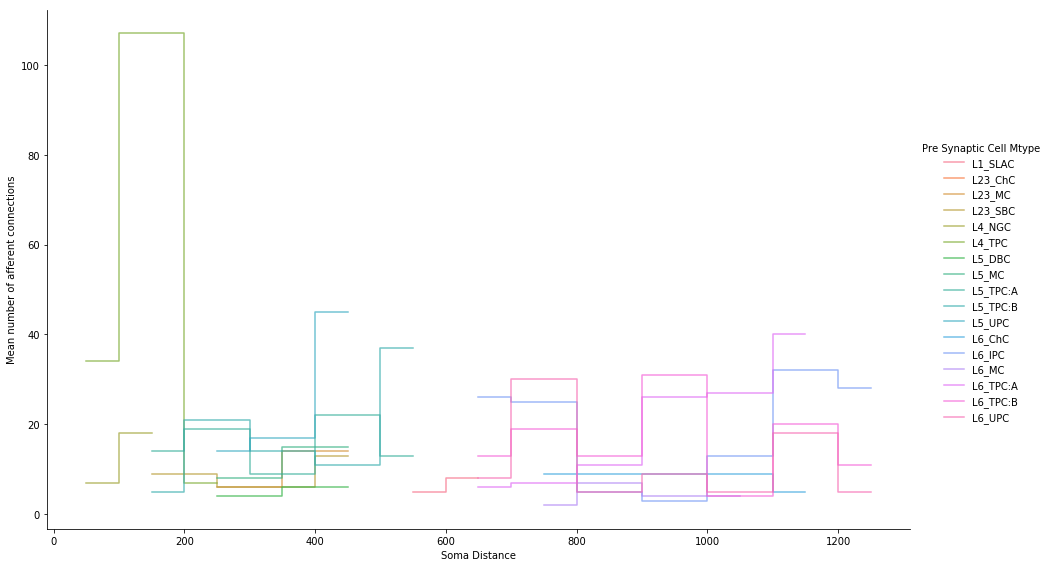

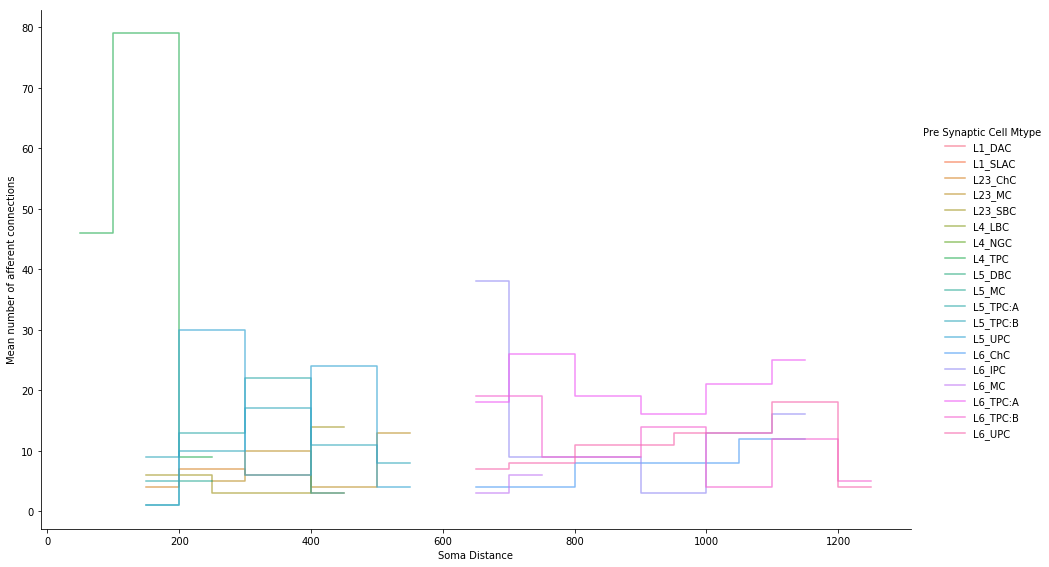

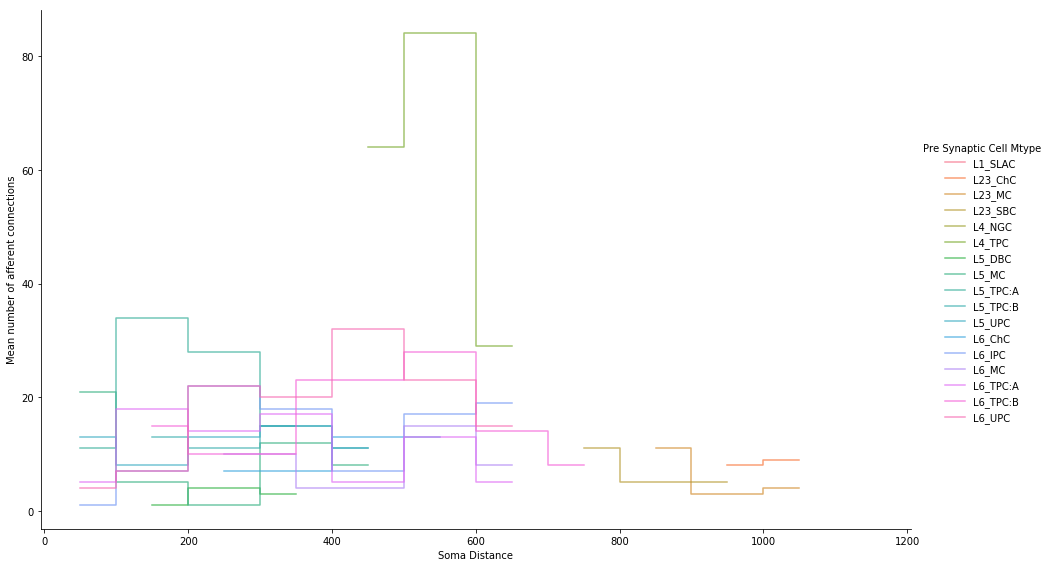

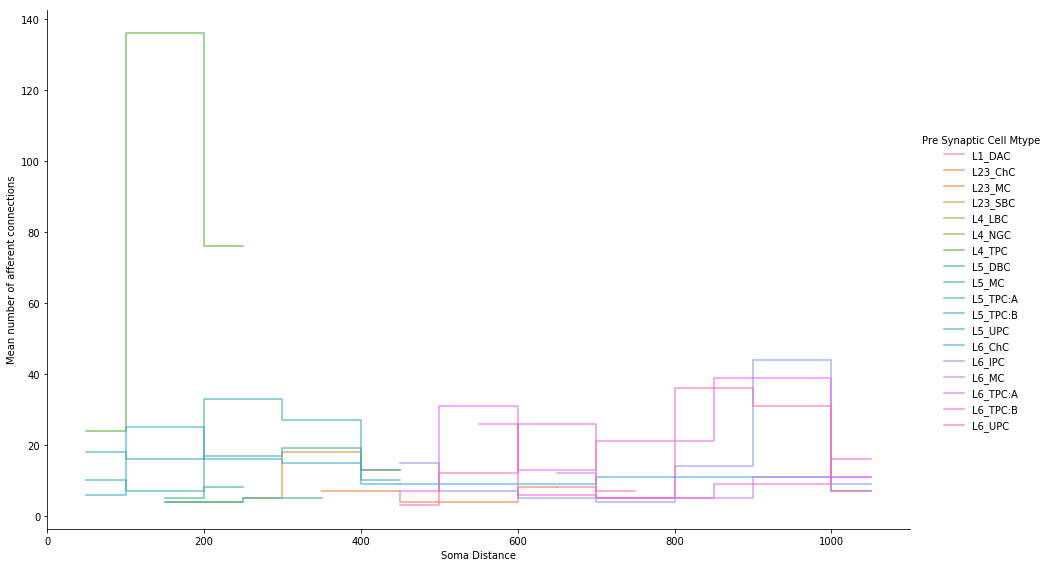

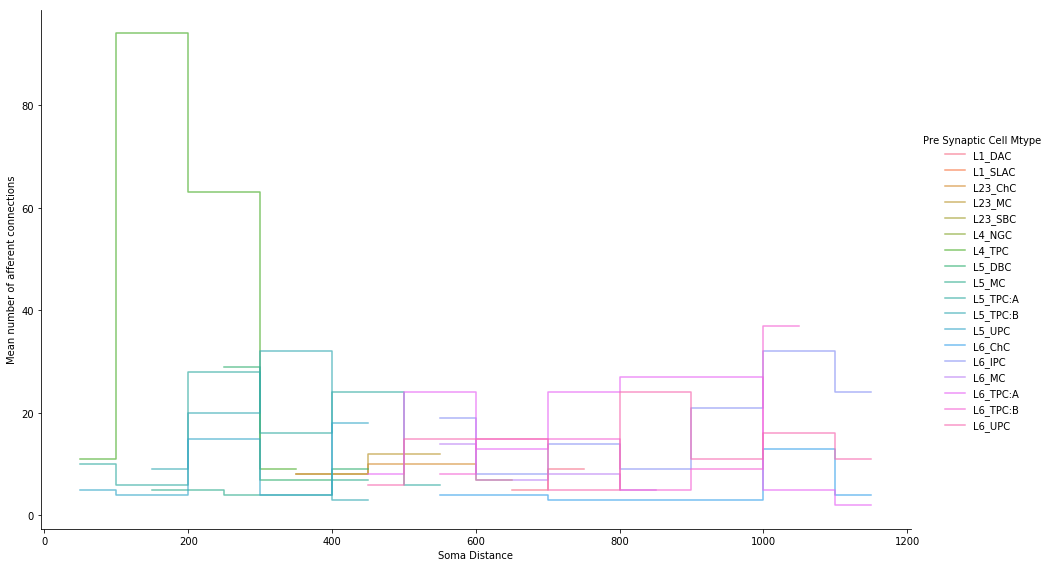

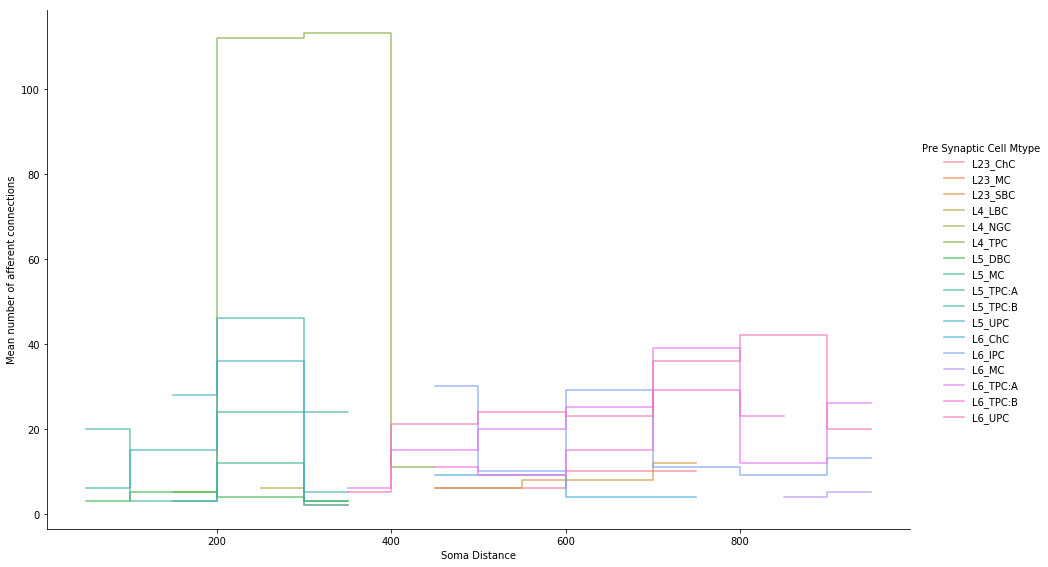

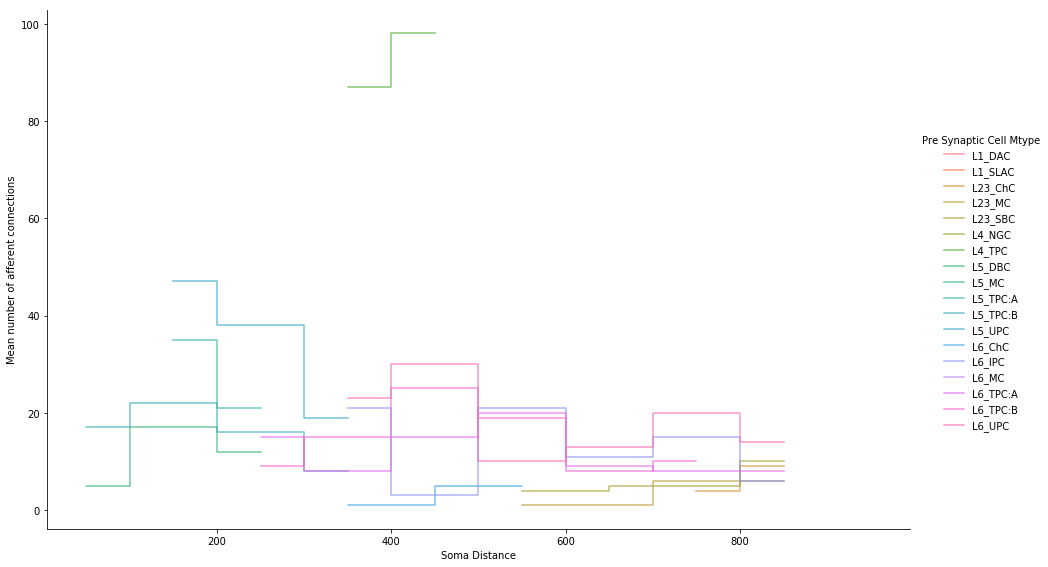

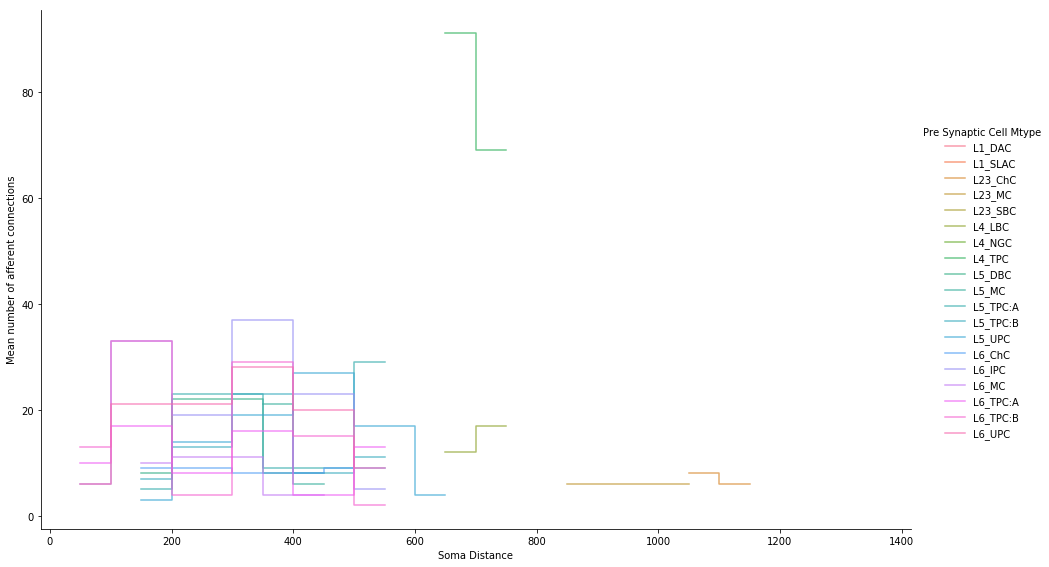

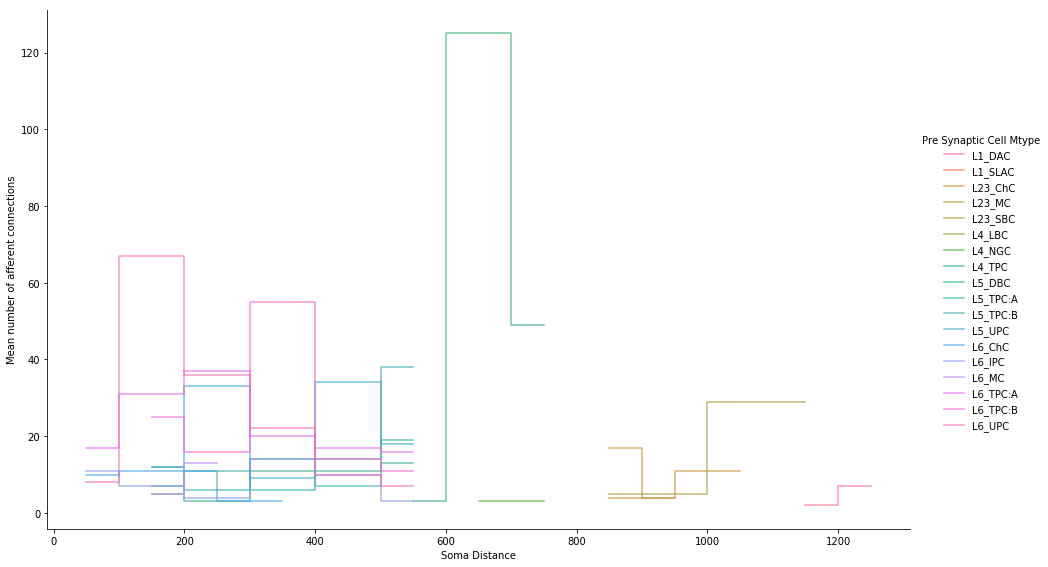

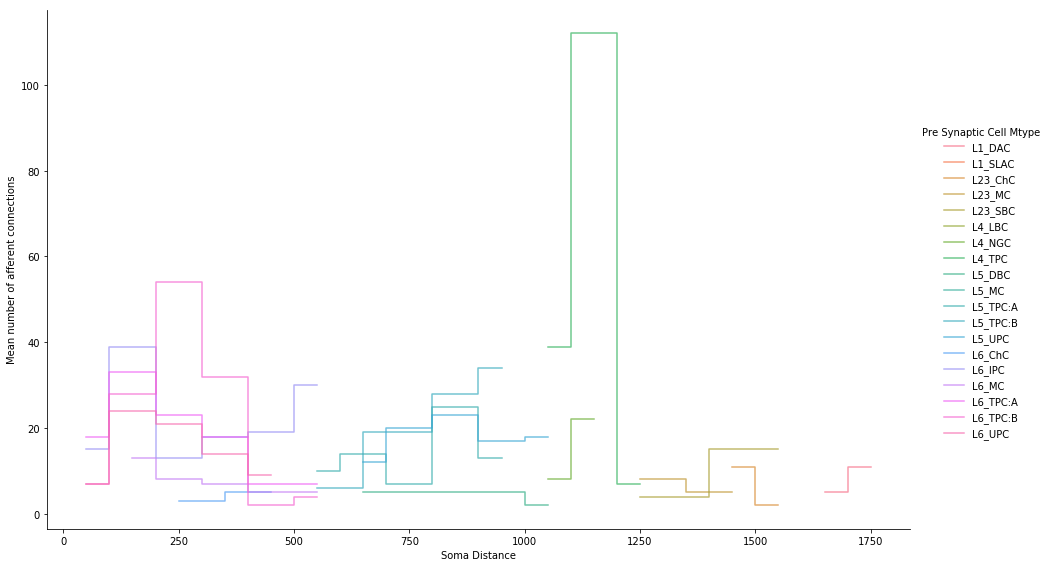

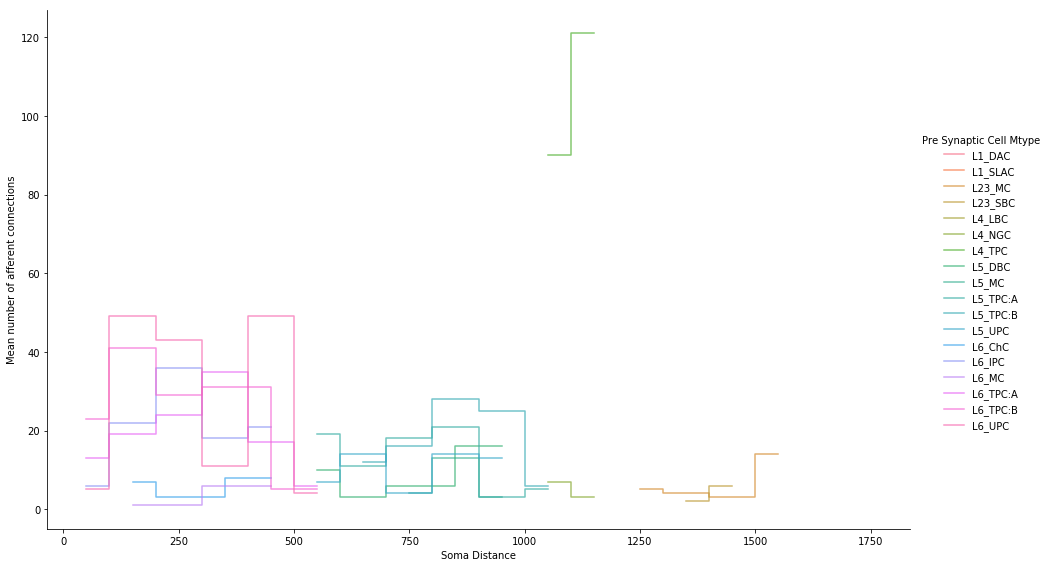

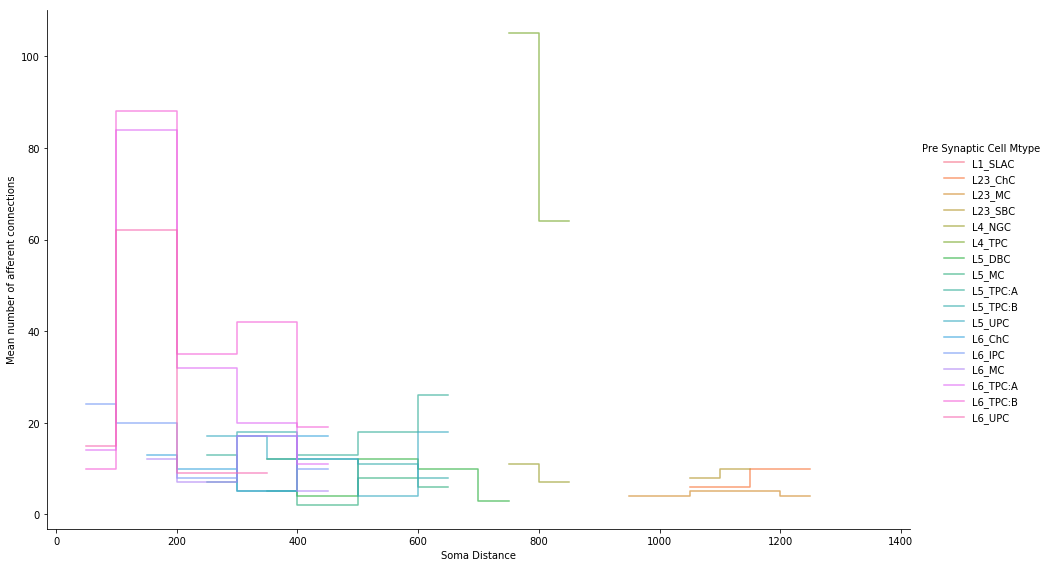

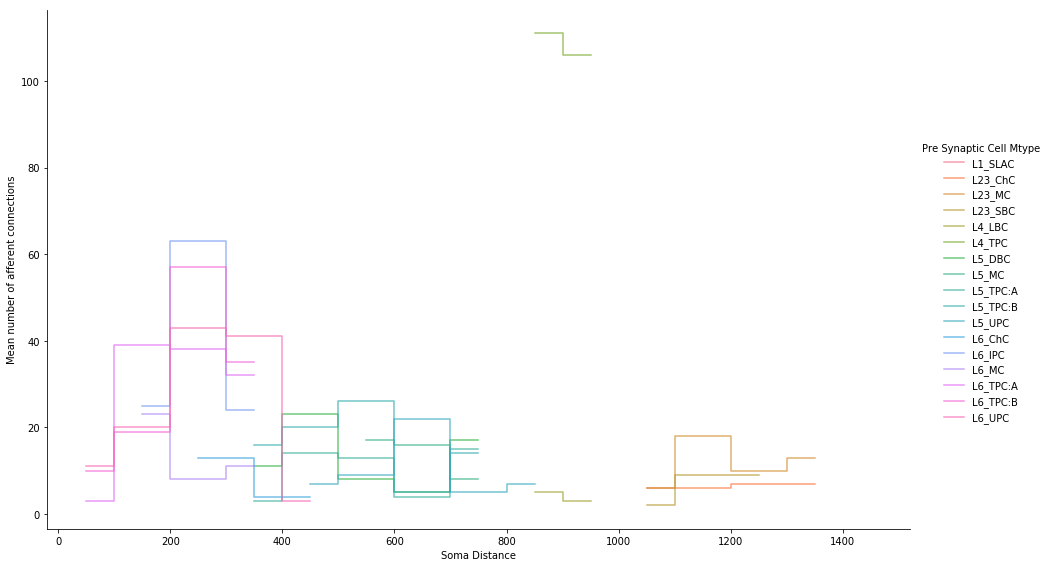

In [16]:
analysis_naff =\
    suite_connectome_analyses\
        .analysis_number_connections_afferent
analysis_naff(
    mock_circuit_model,
    adapter)

O

## SSCx variation

In [ ]:
report_connectome_analyses_bio_m =\
    suite_connectome_analyses\
        .analysis_number_afferent_connections(
            circuit_bio_m,
            adapter)


Because 60 post-synaptic mtypes can take too long, we can set the number of 
mtypes to process in one run:

In [ ]:
def get_layer_mtypes(circuit, query_layer):
    mtypes_all =\
        pd.Series(adapter.get_mtypes(circuit), name="mtype")
    return\
        list(mtypes_all[
                [query_layer in mtype for mtype in mtypes_all]
        ].values)
def analyze_number_afferent_connections(
        circuit,
        adapter,
        selected_mtypes,
        reporter,
        **kwargs):
    """..."""
    suite_connectome_analyses =\
        ConnectomeAnalysesSuite(
            sample_size=20,
            cell_mtypes=selected_mtypes)
    report=\
        suite_connectome_analyses\
            .analysis_number_afferent_connections(
                circuit, adapter, **kwargs)
    return reporter.post(report)

In [ ]:
analyze_number_afferent_connections(
    mock_circuit_model,
    adapter,
    ["L5_TPC:A", "L5_TPC:B",  "L5_UPC"],
    reporter_analyses,
    sample_size=200)

In [ ]:
suite_connectome_analyses =\
    ConnectomeAnalysesSuite(
        sample_size=20,
        cell_mtypes=["L23_MC"])
measurement_example =\
    suite_connectome_analyses\
        .analysis_number_afferent_connections\
        .get_measurement(
            mock_circuit_model,
            adapter)

In [ ]:
measurement_example["data"]